In [1]:
# Packages
library(tidyverse)
library(psych)
library(irr)
library(ggpubr)
library(cocron)
library(sjstats)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


ERROR: Error in library(psych): there is no package called 'psych'


Load data

In [3]:
data = read.csv("../Data/Input/Responses.csv")
data

video,condition,R1,R2,R3,R4,R5
1,2,4,2,5,NA,NA
10,2,NA,NA,4,6,5
11,2,NA,5,4,NA,NA
12,2,NA,NA,5,NA,6
13,2,NA,1,NA,1,NA
14,2,NA,5,NA,4,1
15,2,NA,NA,4,5,3
2,2,4,6,NA,3,NA
3,2,6,6,NA,NA,5
4,2,6,NA,5,5,NA


# Inter-Rater Agreement

In [4]:
goalraw <- data[ which(data$condition==1), ]
goalskel <- data[ which(data$condition==4), ]

aimraw <- data[ which(data$condition==2), ]
aimskel <- data[ which(data$condition==5), ]

noplayraw <- data[ which(data$condition==3), ]
noplayskel <- data[ which(data$condition==6), ]

In [5]:
goalall = cbind(goalraw, (goalskel %>% select(3:7)))
colnames(goalall)[8] <- "R6"
colnames(goalall)[9] <- "R7"
colnames(goalall)[10] <- "R8"
colnames(goalall)[11] <- "R9"
colnames(goalall)[12] <- "R10"

aimall = cbind(aimraw, (aimskel %>% select(3:7)))
colnames(aimall)[8] <- "R6"
colnames(aimall)[9] <- "R7"
colnames(aimall)[10] <- "R8"
colnames(aimall)[11] <- "R9"
colnames(aimall)[12] <- "R10"

noplayall = cbind(noplayraw, (noplayskel %>% select(3:7)))
colnames(noplayall)[8] <- "R6"
colnames(noplayall)[9] <- "R7"
colnames(noplayall)[10] <- "R8"
colnames(noplayall)[11] <- "R9"
colnames(noplayall)[12] <- "R10"

## Agreement within clip-type across video conditions

In [6]:
print("Agreement across all Goal-Oriented clips regardless of condition")
kripp.alpha(as.matrix(t(goalall %>% select(3:12))),method=c('ordinal'))

[1] "Agreement across all Goal-Oriented clips regardless of condition"


ERROR: Error in kripp.alpha(as.matrix(t(goalall %>% select(3:12))), method = c("ordinal")): could not find function "kripp.alpha"


In [7]:
print("Agreement across all Aimless clips regardless of condition")
kripp.alpha(as.matrix(t(aimall %>% select(3:12))),method=c('ordinal'))

[1] "Agreement across all Aimless clips regardless of condition"


ERROR: Error in kripp.alpha(as.matrix(t(aimall %>% select(3:12))), method = c("ordinal")): could not find function "kripp.alpha"


In [7]:
print("Agreement across all No Play clips regardless of condition")
kripp.alpha(as.matrix(t(noplayall %>% select(3:12))),method=c('ordinal'))

[1] "Agreement across all No Play clips regardless of condition"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 10 
    alpha = 0.267 

## Agreement in each Condition

In [8]:
print("Agreement across Full-Scene Goal-Oriented clips")
kripp.alpha(as.matrix(t(goalraw %>% select(3:7))),method=c('ordinal'))

print("Agreement across Movement-Alone Goal-Oriented clips")
kripp.alpha(as.matrix(t(goalskel %>% select(3:7))),method=c('ordinal'))

[1] "Agreement across Full-Scene Goal-Oriented clips"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 5 
    alpha = 0.382 

[1] "Agreement across Movement-Alone Goal-Oriented clips"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 5 
    alpha = 0.368 

In [9]:
print("Agreement across Full-Scene Aimless clips")
kripp.alpha(as.matrix(t(aimraw %>% select(3:7))),method=c('ordinal'))

print("Agreement across Movement-Alone Aimless clips")
kripp.alpha(as.matrix(t(aimskel %>% select(3:7))),method=c('ordinal'))

[1] "Agreement across Full-Scene Aimless clips"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 5 
    alpha = 0.247 

[1] "Agreement across Movement-Alone Aimless clips"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 5 
    alpha = -0.0217 

In [10]:
print("Agreement across Full-Scene No Play clips")
kripp.alpha(as.matrix(t(noplayraw %>% select(3:7))),method=c('ordinal'))

print("Agreement across Movement-Alone No Play clips")
kripp.alpha(as.matrix(t(noplayskel %>% select(3:7))),method=c('ordinal'))

[1] "Agreement across Full-Scene No Play clips"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 5 
    alpha = 0.126 

[1] "Agreement across Movement-Alone No Play clips"


 Krippendorff's alpha

 Subjects = 15 
   Raters = 5 
    alpha = 0.202 

# Ratings

In [8]:
R1 = cbind(goalall[,1:2], goalall[,3])
R2 = cbind(goalall[,1:2], goalall[,4])
R3 = cbind(goalall[,1:2], goalall[,5])
R4 = cbind(goalall[,1:2], goalall[,6])
R5 = cbind(goalall[,1:2], goalall[,7])
R6 = cbind(goalall[,1:2], goalall[,8])
R7 = cbind(goalall[,1:2], goalall[,9])
R8 = cbind(goalall[,1:2], goalall[,10])
R9 = cbind(goalall[,1:2], goalall[,11])
R10 = cbind(goalall[,1:2], goalall[,12])

goal_long = rbind(as.matrix(R1), as.matrix(R2), as.matrix(R3), as.matrix(R4), as.matrix(R5),
                 as.matrix(R6), as.matrix(R7), as.matrix(R8), as.matrix(R9), as.matrix(R10))
colnames(goal_long)[3] <- "ratings"

R1 = cbind(aimall[,1:2], aimall[,3])
R2 = cbind(aimall[,1:2], aimall[,4])
R3 = cbind(aimall[,1:2], aimall[,5])
R4 = cbind(aimall[,1:2], aimall[,6])
R5 = cbind(aimall[,1:2], aimall[,7])
R6 = cbind(aimall[,1:2], aimall[,8])
R7 = cbind(aimall[,1:2], aimall[,9])
R8 = cbind(aimall[,1:2], aimall[,10])
R9 = cbind(aimall[,1:2], aimall[,11])
R10 = cbind(aimall[,1:2], aimall[,12])

aim_long = rbind(as.matrix(R1), as.matrix(R2), as.matrix(R3), as.matrix(R4), as.matrix(R5),
                 as.matrix(R6), as.matrix(R7), as.matrix(R8), as.matrix(R9), as.matrix(R10))
colnames(aim_long)[3] <- "ratings"

R1 = cbind(noplayall[,1:2], noplayall[,3])
R2 = cbind(noplayall[,1:2], noplayall[,4])
R3 = cbind(noplayall[,1:2], noplayall[,5])
R4 = cbind(noplayall[,1:2], noplayall[,6])
R5 = cbind(noplayall[,1:2], noplayall[,7])
R6 = cbind(noplayall[,1:2], noplayall[,8])
R7 = cbind(noplayall[,1:2], noplayall[,9])
R8 = cbind(noplayall[,1:2], noplayall[,10])
R9 = cbind(noplayall[,1:2], noplayall[,11])
R10 = cbind(noplayall[,1:2], noplayall[,12])

noplay_long = rbind(as.matrix(R1), as.matrix(R2), as.matrix(R3), as.matrix(R4), as.matrix(R5),
                 as.matrix(R6), as.matrix(R7), as.matrix(R8), as.matrix(R9), as.matrix(R10))
colnames(noplay_long)[3] <- "ratings"

In [9]:
message('Goal Mean Rating: ', mean(goal_long[,3],na.rm = TRUE)) 
message('Standard deviation: ', sd(goal_long[,3],na.rm = TRUE))
message()
message('Aimless Mean Rating: ', mean(aim_long[,3],na.rm = TRUE))
message('Standard deviation: ', sd(aim_long[,3],na.rm = TRUE)) 
message()
message('No Play Mean Rating: ', mean(noplay_long[,3],na.rm = TRUE))
message('Standard deviation: ', sd(noplay_long[,3],na.rm = TRUE))

Goal Mean Rating: 4.81111111111111
Standard deviation: 1.25326041703585

Aimless Mean Rating: 4.16666666666667
Standard deviation: 1.51583403081893

No Play Mean Rating: 2.43333333333333
Standard deviation: 1.54374417162162


In [10]:
all_long=rbind(goal_long, aim_long, noplay_long)
all_long <- as.data.frame(all_long)
all_long$condition[all_long$condition==1] <- '1_goal'
all_long$condition[all_long$condition==4] <- '1_goal'
all_long$condition[all_long$condition==2] <- '2_aimless'
all_long$condition[all_long$condition==5] <- '2_aimless'
all_long$condition[all_long$condition==3] <- '3_noplay'
all_long$condition[all_long$condition==6] <- '3_noplay'

colnames(all_long)[2] <- "cliptype"

Warning message:
"Removed 180 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 180 rows containing non-finite values (stat_boxplot)."

null device 
          1

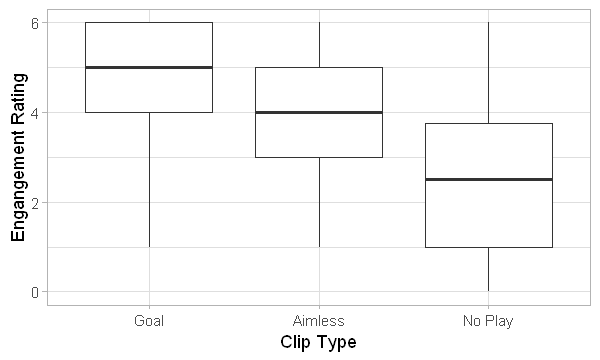

In [11]:
all_long$cliptype <- as.factor(all_long$cliptype)
all_long$video <- as.factor(all_long$video)

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(all_long, aes(cliptype, ratings))+geom_boxplot()+ theme_bw()+ theme_light()+
  ylab("Engangement Rating") + xlab("Clip Type") + scale_x_discrete(labels=c("1_goal" = "Goal", 
                                                                             "2_aimless" = "Aimless", 
                                                                             "3_noplay" = "No Play"))
ggsave('boxplot.pdf', width=5, height= 3) #A4 size in inches
dev.off()


Warning message:
"Removed 60 rows containing non-finite values (stat_count)."Warning message:
"Removed 60 rows containing non-finite values (stat_count)."

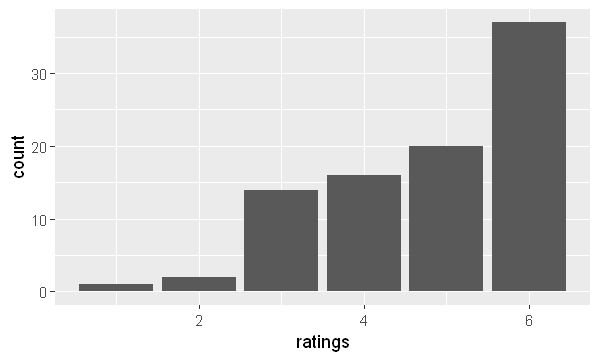

Warning message:
"Removed 60 rows containing non-finite values (stat_count)."

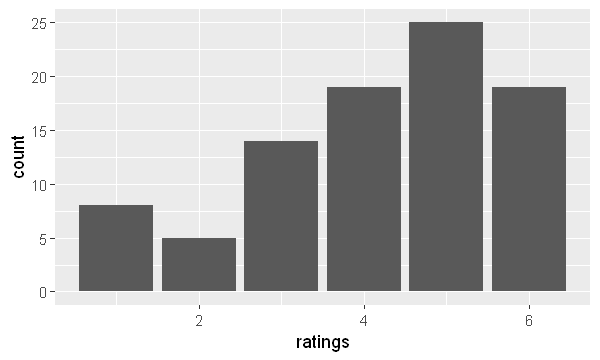

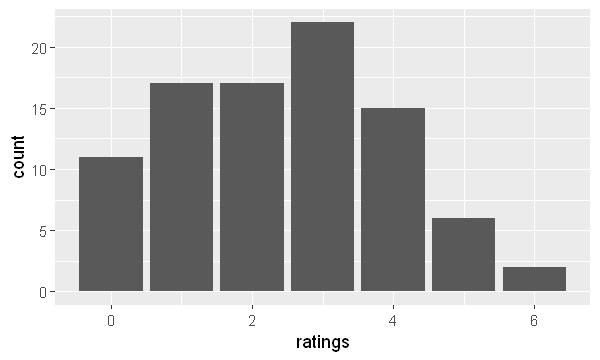

In [23]:
goal_plot=subset(all_long,  cliptype=='1_goal')
aim_plot=subset(all_long,  cliptype=='2_aimless')
no_plot=subset(all_long,  cliptype=='3_noplay')
ggplot(goal_plot, aes(ratings)) + geom_bar(stat="count")
ggplot(aim_plot, aes(ratings)) + geom_bar(stat="count")
ggplot(no_plot, aes(ratings)) + geom_bar(stat="count")

## ANOVA - Effect of clip-type on ratings

In [15]:
res.aov <- aov(ratings ~ cliptype, data = all_long)
summary(res.aov)
eta_sq(res.aov, partial = TRUE)

             Df Sum Sq Mean Sq F value Pr(>F)    
cliptype      2  272.2  136.10   65.31 <2e-16 ***
Residuals   267  556.4    2.08                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
180 observations deleted due to missingness

term,partial.etasq
cliptype,0.3285163


In [16]:
TukeyHSD(res.aov, which = "cliptype")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ratings ~ cliptype, data = all_long)

$cliptype
                         diff       lwr        upr     p adj
2_aimless-1_goal   -0.6444444 -1.151623 -0.1372657 0.0084191
3_noplay-1_goal    -2.3777778 -2.884957 -1.8705990 0.0000000
3_noplay-2_aimless -1.7333333 -2.240512 -1.2261546 0.0000000
